In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, BatchNormalization, Dropout, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
X_train = np.load("../SpeechER/data_split/X_train.npy")
X_test = np.load("../SpeechER/data_split/X_test.npy")
y_train = np.load("../SpeechER/data_split/y_train.npy")
y_test = np.load("../SpeechER/data_split/y_test.npy")

In [6]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1],1), return_sequences=True))
model.add(Dropout(0.5))
model.add(Conv1D(filters=32*8, kernel_size=5, activation="relu", padding="same"))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(BatchNormalization())
model.add(Conv1D(filters=32*4, kernel_size=5, activation="relu", padding="same"))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(BatchNormalization())
model.add(Conv1D(filters=32*2, kernel_size=5, activation="relu", padding="same"))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(BatchNormalization())
model.add(Conv1D(filters=32, kernel_size=5, activation="relu", padding="same"))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=8, activation="softmax"))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()
model.save(filepath="../SpeechER/models/model5.h5")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 162, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 162, 128)          0         
                                                                 
 conv1d (Conv1D)             (None, 162, 256)          164096    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 33, 256)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 33, 256)          1024      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 33, 128)          

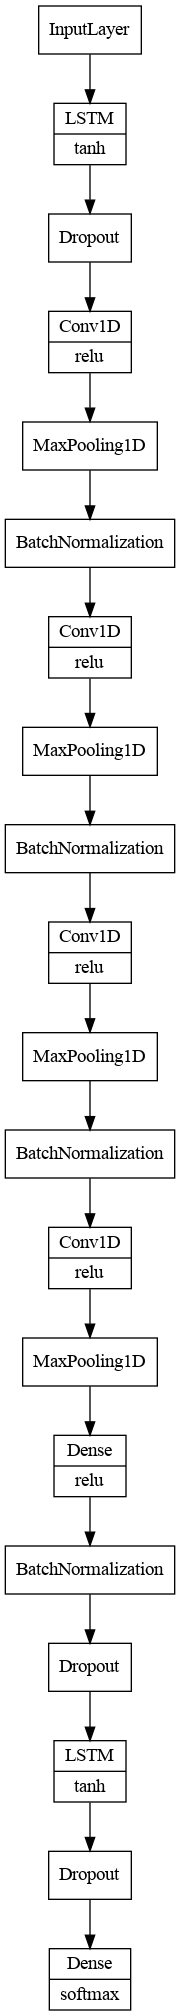

In [7]:
plot_model(model, "../SpeechER/figs/m5arc.png", show_layer_names=False, show_layer_activations=True)

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint("../SpeechER/checkpoints/model5_best", save_best_only=True)
stop_early = EarlyStopping(monitor='val_loss', patience=20)

In [6]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[stop_early, checkpoint])

Epoch 1/100


2023-06-04 11:43:21.234863: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8901
2023-06-04 11:43:21.777167: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1401552896 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 10485760/4100456448
2023-06-04 11:43:21.777196: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      1074790400
InUse:                        77000940
MaxInUse:                    102720740
NumAllocs:                         290
MaxAllocSize:                 30048256
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-06-04 11:43:21.777210: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocati

856/856 [==============================] - ETA: 0s - loss: 1.5943 - accuracy: 0.3731

2023-06-04 11:43:33.752314: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1159331840 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 12582912/4100456448
2023-06-04 11:43:33.752344: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      1074790400
InUse:                        46985668
MaxInUse:                    122222324
NumAllocs:                      295614
MaxAllocSize:                 45252608
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-06-04 11:43:33.752357: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-06-04 11:43:33.752360: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


856/856 [==============================] - 22s 20ms/step - loss: 1.5943 - accuracy: 0.3731 - val_loss: 1.5279 - val_accuracy: 0.3990
Epoch 2/100
853/856 [============================>.] - ETA: 0s - loss: 1.3636 - accuracy: 0.4701

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


856/856 [==============================] - 17s 20ms/step - loss: 1.3633 - accuracy: 0.4701 - val_loss: 1.3210 - val_accuracy: 0.4941
Epoch 3/100
852/856 [============================>.] - ETA: 0s - loss: 1.2914 - accuracy: 0.5003

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


856/856 [==============================] - 17s 20ms/step - loss: 1.2913 - accuracy: 0.5005 - val_loss: 1.2727 - val_accuracy: 0.4968
Epoch 4/100
852/856 [============================>.] - ETA: 0s - loss: 1.2336 - accuracy: 0.5195

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


856/856 [==============================] - 18s 21ms/step - loss: 1.2339 - accuracy: 0.5194 - val_loss: 1.1810 - val_accuracy: 0.5400
Epoch 5/100
856/856 [==============================] - 13s 15ms/step - loss: 1.2027 - accuracy: 0.5313 - val_loss: 1.3018 - val_accuracy: 0.4927
Epoch 6/100
856/856 [==============================] - 12s 15ms/step - loss: 1.1668 - accuracy: 0.5451 - val_loss: 1.2116 - val_accuracy: 0.5296
Epoch 7/100
856/856 [==============================] - ETA: 0s - loss: 1.1286 - accuracy: 0.5578

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


856/856 [==============================] - 18s 21ms/step - loss: 1.1286 - accuracy: 0.5578 - val_loss: 1.1308 - val_accuracy: 0.5532
Epoch 8/100
856/856 [==============================] - 12s 14ms/step - loss: 1.1045 - accuracy: 0.5734 - val_loss: 1.2140 - val_accuracy: 0.5118
Epoch 9/100
855/856 [============================>.] - ETA: 0s - loss: 1.0799 - accuracy: 0.5785

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


856/856 [==============================] - 17s 19ms/step - loss: 1.0799 - accuracy: 0.5785 - val_loss: 1.1283 - val_accuracy: 0.5590
Epoch 10/100
856/856 [==============================] - 12s 14ms/step - loss: 1.0535 - accuracy: 0.5914 - val_loss: 1.2072 - val_accuracy: 0.5320
Epoch 11/100
856/856 [==============================] - 12s 14ms/step - loss: 1.0317 - accuracy: 0.6001 - val_loss: 1.1478 - val_accuracy: 0.5526
Epoch 12/100
852/856 [============================>.] - ETA: 0s - loss: 1.0132 - accuracy: 0.6072

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


856/856 [==============================] - 17s 19ms/step - loss: 1.0137 - accuracy: 0.6070 - val_loss: 1.1213 - val_accuracy: 0.5603
Epoch 13/100
853/856 [============================>.] - ETA: 0s - loss: 0.9908 - accuracy: 0.6158

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


856/856 [==============================] - 17s 19ms/step - loss: 0.9907 - accuracy: 0.6160 - val_loss: 1.0345 - val_accuracy: 0.5886
Epoch 14/100
856/856 [==============================] - 12s 14ms/step - loss: 0.9624 - accuracy: 0.6278 - val_loss: 1.1349 - val_accuracy: 0.5652
Epoch 15/100
856/856 [==============================] - 12s 14ms/step - loss: 0.9437 - accuracy: 0.6356 - val_loss: 1.0843 - val_accuracy: 0.5868
Epoch 16/100
855/856 [============================>.] - ETA: 0s - loss: 0.9243 - accuracy: 0.6477

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


856/856 [==============================] - 17s 20ms/step - loss: 0.9246 - accuracy: 0.6476 - val_loss: 1.0301 - val_accuracy: 0.6035
Epoch 17/100
856/856 [==============================] - 12s 14ms/step - loss: 0.9005 - accuracy: 0.6585 - val_loss: 1.0408 - val_accuracy: 0.6035
Epoch 18/100
856/856 [==============================] - 12s 14ms/step - loss: 0.8798 - accuracy: 0.6634 - val_loss: 1.0472 - val_accuracy: 0.5960
Epoch 19/100
856/856 [==============================] - 12s 14ms/step - loss: 0.8636 - accuracy: 0.6719 - val_loss: 1.0427 - val_accuracy: 0.6107
Epoch 20/100
856/856 [==============================] - ETA: 0s - loss: 0.8435 - accuracy: 0.6827

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model5_best/assets


856/856 [==============================] - 17s 19ms/step - loss: 0.8435 - accuracy: 0.6827 - val_loss: 1.0156 - val_accuracy: 0.6137
Epoch 21/100
856/856 [==============================] - 12s 14ms/step - loss: 0.8318 - accuracy: 0.6852 - val_loss: 1.0437 - val_accuracy: 0.6056
Epoch 22/100
856/856 [==============================] - 12s 14ms/step - loss: 0.8128 - accuracy: 0.6932 - val_loss: 1.0636 - val_accuracy: 0.6091
Epoch 23/100
856/856 [==============================] - 12s 14ms/step - loss: 0.8010 - accuracy: 0.6995 - val_loss: 1.2121 - val_accuracy: 0.5764
Epoch 24/100
856/856 [==============================] - 13s 15ms/step - loss: 0.7807 - accuracy: 0.7052 - val_loss: 1.1280 - val_accuracy: 0.5868
Epoch 25/100
856/856 [==============================] - 12s 14ms/step - loss: 0.7599 - accuracy: 0.7144 - val_loss: 1.0428 - val_accuracy: 0.6239
Epoch 26/100
856/856 [==============================] - 12s 14ms/step - loss: 0.7479 - accuracy: 0.7208 - val_loss: 1.0491 - val_accuracy

In [7]:
eval = model.evaluate(X_test, y_test)

286/286 [==============================] - 1s 5ms/step - loss: 1.0996 - accuracy: 0.6383


In [8]:
encoder = OneHotEncoder()
Y = np.load("../SpeechER/feature_labels.npy")
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [9]:
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)


df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

286/286 [==============================] - 2s 4ms/step


,Predicted Labels,Actual Labels
0,happy,disgust
1,sad,sad
2,disgust,happy
3,happy,disgust
4,happy,happy
5,calm,calm
6,happy,happy
7,neutral,neutral
8,surprise,surprise
9,neutral,sad


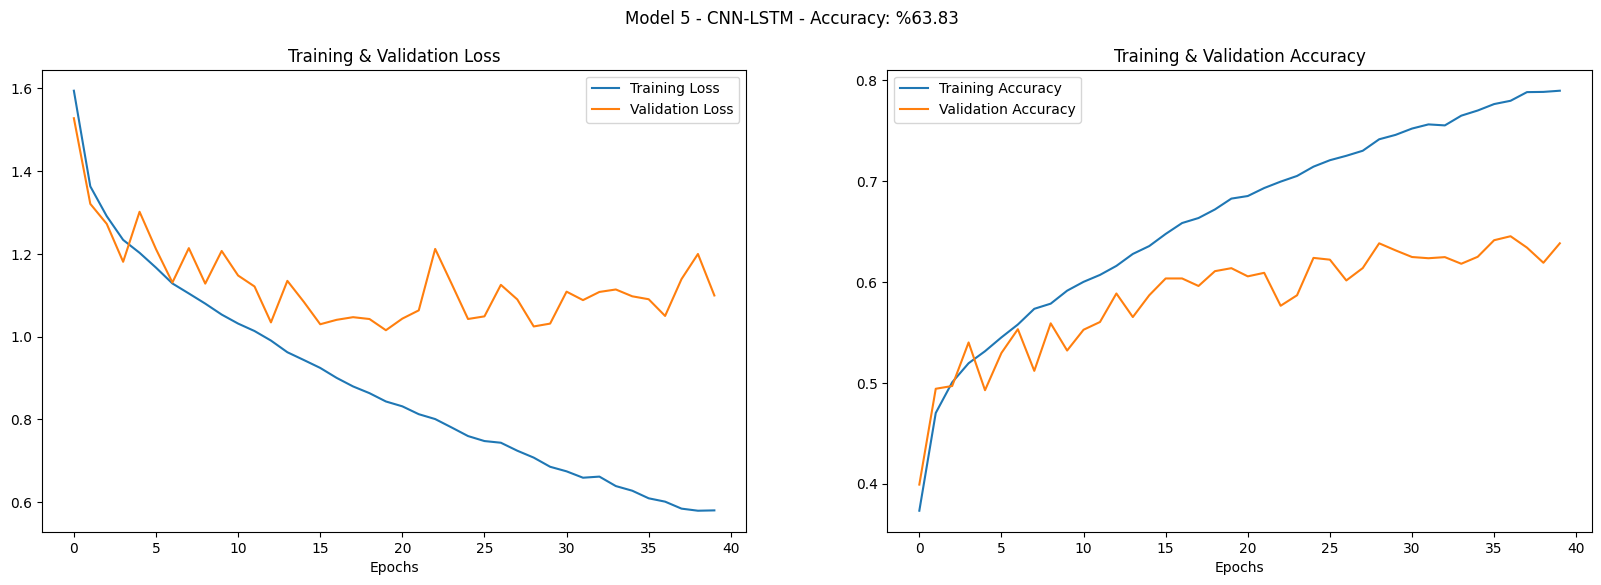

In [10]:
epochs = [i for i in range(len(history.history["loss"]))]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
fig.suptitle(f"Model 5 - CNN-LSTM - Accuracy: %{round(eval[1]*100,2)}")
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.savefig("../SpeechER/figs/model5.png")

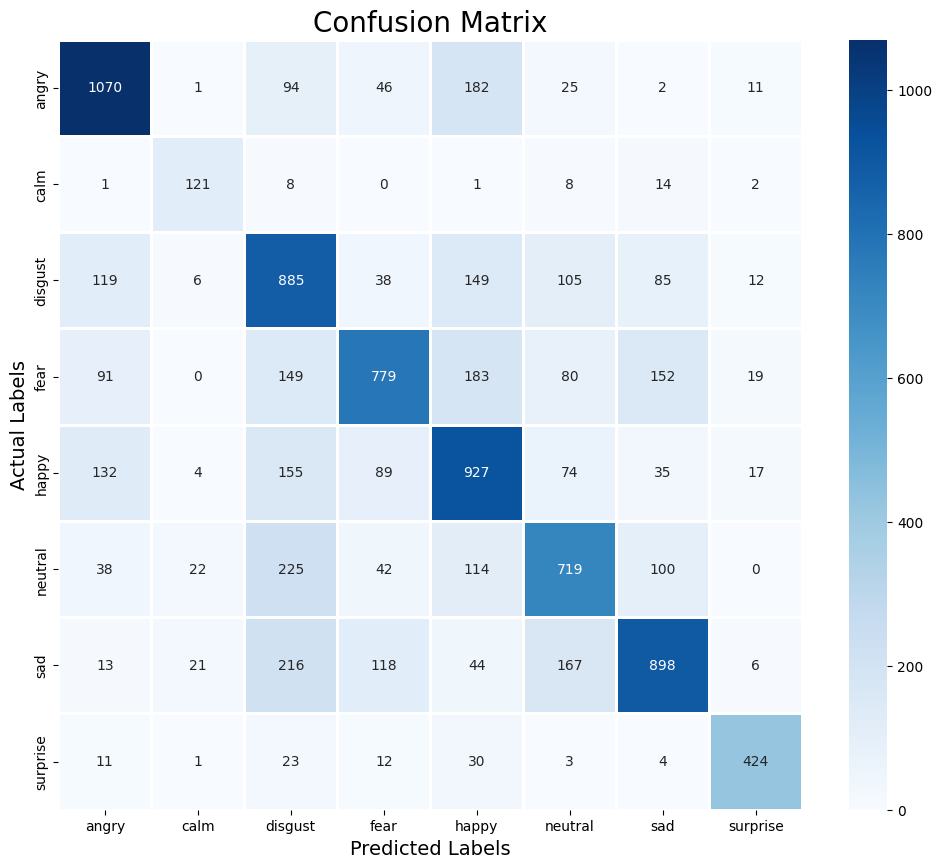

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.73      0.75      0.74      1431
        calm       0.69      0.78      0.73       155
     disgust       0.50      0.63      0.56      1399
        fear       0.69      0.54      0.60      1453
       happy       0.57      0.65      0.61      1433
     neutral       0.61      0.57      0.59      1260
         sad       0.70      0.61      0.65      1483
    surprise       0.86      0.83      0.85       508

    accuracy                           0.64      9122
   macro avg       0.67      0.67      0.67      9122
weighted avg       0.65      0.64      0.64      9122

